# Model Training

### 1.1  Import Data and zRequired Packages

In [1]:
# Basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import warnings


#### Import the CSV Data as Pandas Dataframe

In [5]:
df = pd.read_csv('../data/Cars_24.csv')

In [7]:
df = df.sample(frac=1)

In [8]:
df

,Year,Company,Model,Transmission,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price
2100,2013,Maruti,Swift,Manual,62217,1st Owner,Petrol,KA-03,Bengaluru,486000
214,2020,Maruti,S PRESSO,Manual,63298,1st Owner,Petrol,TS-05,Hyderabad,403000
2673,2017,Maruti,Celerio,Manual,79381,1st Owner,Petrol,TN-12,Chennai,419000
4407,2014,Hyundai,Elite i20,Manual,76697,3rd Owner,Diesel,TN-02,Chennai,525000
4300,2016,Hyundai,Grand i10,Manual,49548,1st Owner,Petrol,HR-26,New Delhi,463000
...,...,...,...,...,...,...,...,...,...,...
3046,2013,Maruti,Swift,Manual,121617,2nd Owner,Petrol,AP-09,Hyderabad,379000
6060,2012,Honda,Brio,Manual,90184,1st Owner,Petrol,AP-28,Hyderabad,349000
821,2015,Maruti,Swift,Manual,60559,1st Owner,Petrol,RJ-14,Jaipur,449000
2893,2014,Maruti,Alto 800,Manual,24027,1st Owner,Petrol,MH-02,Mumbai,211000


In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
X = df.drop(columns=['Price'], axis=1)
y = df['Price']

In [12]:
X.head()

,Year,Company,Model,Transmission,Kms_Driven,ownership,Fuel_Type,Passing,Area
0,2013,Maruti,Swift,Manual,62217,1st Owner,Petrol,KA-03,Bengaluru
1,2020,Maruti,S PRESSO,Manual,63298,1st Owner,Petrol,TS-05,Hyderabad
2,2017,Maruti,Celerio,Manual,79381,1st Owner,Petrol,TN-12,Chennai
3,2014,Hyundai,Elite i20,Manual,76697,3rd Owner,Diesel,TN-02,Chennai
4,2016,Hyundai,Grand i10,Manual,49548,1st Owner,Petrol,HR-26,New Delhi


In [13]:
y.head()

0    486000
1    403000
2    419000
3    525000
4    463000
Name: Price, dtype: int64

In [14]:
num_features = [feature for feature in X.columns if X[feature].dtype!='O']
cat_features = [feature for feature in X.columns if X[feature].dtype=='O']
all_features = [feature for feature in X.columns]

In [16]:
print("Categorical Features   :   ",cat_features)
print("Numerical Features    :    ",num_features)

Categorical Features   :    ['Company', 'Model', 'Transmission', 'ownership', 'Fuel_Type', 'Passing', 'Area']
Numerical Features    :     ['Year', 'Kms_Driven']


In [21]:
# create column Transformers  with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [19]:
df

,Year,Company,Model,Transmission,Kms_Driven,ownership,Fuel_Type,Passing,Area,Price
0,2013,Maruti,Swift,Manual,62217,1st Owner,Petrol,KA-03,Bengaluru,486000
1,2020,Maruti,S PRESSO,Manual,63298,1st Owner,Petrol,TS-05,Hyderabad,403000
2,2017,Maruti,Celerio,Manual,79381,1st Owner,Petrol,TN-12,Chennai,419000
3,2014,Hyundai,Elite i20,Manual,76697,3rd Owner,Diesel,TN-02,Chennai,525000
4,2016,Hyundai,Grand i10,Manual,49548,1st Owner,Petrol,HR-26,New Delhi,463000
...,...,...,...,...,...,...,...,...,...,...
7859,2013,Maruti,Swift,Manual,121617,2nd Owner,Petrol,AP-09,Hyderabad,379000
7860,2012,Honda,Brio,Manual,90184,1st Owner,Petrol,AP-28,Hyderabad,349000
7861,2015,Maruti,Swift,Manual,60559,1st Owner,Petrol,RJ-14,Jaipur,449000
7862,2014,Maruti,Alto 800,Manual,24027,1st Owner,Petrol,MH-02,Mumbai,211000


In [20]:
Encoder = ce.TargetEncoder(cols='Model')
Encoder.fit_transform(df['Model'], df['Price'])

,Model
0,508761.960133
1,467571.603369
2,463693.832721
3,613789.090909
4,480265.141612
...,...
7859,508761.960133
7860,341291.442947
7861,508761.960133
7862,287104.674007


In [23]:
preprocessor = ColumnTransformer(
    [
        ('TargetEncoder',ce.TargetEncoder(cols=['Area','Model',]),['Area','Model']),
        ('OneHotEncoder',OneHotEncoder(),['Company','Transmission','ownership','Fuel_Type']),
        ("Ordinal Encode",OrdinalEncoder(),['Passing']),
        ("StandardScaler",StandardScaler(),['Kms_Driven','Year']),
    ]
)

oh = Company,Transmission,ownership,Fuel_Type,
TE = Model,Area,
OE = Passing
num = Kms_Driven

In [24]:
preprocessor

ColumnTransformer(transformers=[('TargetEncoder',
                                 TargetEncoder(cols=['Area', 'Model']),
                                 ['Area', 'Model']),
                                ('OneHotEncoder', OneHotEncoder(),
                                 ['Company', 'Transmission', 'ownership',
                                  'Fuel_Type']),
                                ('Ordinal Encode', OrdinalEncoder(),
                                 ['Passing']),
                                ('StandardScaler', StandardScaler(),
                                 ['Kms_Driven', 'Year'])])

In [25]:
X=preprocessor.fit_transform(X=X, y=y)

In [26]:
X

array([[ 6.44600861e+05,  5.08761960e+05,  0.00000000e+00, ...,
         1.11000000e+02,  3.85954957e-01, -1.41678527e+00],
       [ 6.39281224e+05,  4.67571603e+05,  0.00000000e+00, ...,
         3.68000000e+02,  4.25807524e-01,  1.03230236e+00],
       [ 6.13399657e+05,  4.63693833e+05,  0.00000000e+00, ...,
         3.10000000e+02,  1.01872967e+00, -1.73066249e-02],
       ...,
       [ 5.94051615e+05,  5.08761960e+05,  0.00000000e+00, ...,
         2.83000000e+02,  3.24830482e-01, -7.17045947e-01],
       [ 6.18583108e+05,  2.87104674e+05,  0.00000000e+00, ...,
         1.99000000e+02, -1.02197247e+00, -1.06691561e+00],
       [ 4.23013352e+05,  6.26594444e+05,  0.00000000e+00, ...,
         2.28000000e+02, -1.23115237e+00, -1.73066249e-02]])

In [27]:
X.shape

(7864, 30)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((6291, 30), (6291,))

### Create an Evaluation Function to giev all metrics after model Training



In [29]:
def evaluate_model(true, pred):
    mae = mean_absolute_error(true, pred)
    mse = mean_squared_error(true,pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, pred)
    return mae, rmse, r2_square
    

In [30]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbours Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor(),
    "Logistic Regression":LogisticRegression(),
    "XG Boost Regressor":XGBRegressor(),
    'Cat Boost Regressor':CatBoostRegressor(),
}

In [31]:
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training set")
    print(" - Root Mean squared error : {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute error : {:.4f}".format(model_train_mae))
    print(" - R2 squared error : {:.4f}".format(model_train_r2))
    print('-------------------------------------------------------------')
    print("Model Performance for Testing set")
    print(" - Root Mean squared error : {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute error : {:.4f}".format(model_test_mae))
    print(" - R2 squared error : {:.4f}".format(model_test_r2))
    print("=============================================================",end='\n\n')
    r2_list.append(model_test_r2)
    

Linear Regression
Model Performance for Training set
 - Root Mean squared error : 127520.9023
 - Mean Absolute error : 81293.9998
 - R2 squared error : 0.7704
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 119889.8225
 - Mean Absolute error : 79201.3345
 - R2 squared error : 0.7908



/home/kishor/Coding/Commodity/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.781e+12, tolerance: 4.455e+10
  model = cd_fast.enet_coordinate_descent(


Lasso
Model Performance for Training set
 - Root Mean squared error : 127520.9857
 - Mean Absolute error : 81295.8856
 - R2 squared error : 0.7704
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 119864.0059
 - Mean Absolute error : 79188.2844
 - R2 squared error : 0.7909

Ridge
Model Performance for Training set
 - Root Mean squared error : 127674.4288
 - Mean Absolute error : 81402.7389
 - R2 squared error : 0.7698
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 119225.3114
 - Mean Absolute error : 79011.0497
 - R2 squared error : 0.7931

K-Neighbours Regressor
Model Performance for Training set
 - Root Mean squared error : 122779.5800
 - Mean Absolute error : 75579.5667
 - R2 squared error : 0.7871
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 139611.4292

/home/kishor/Coding/Commodity/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model Performance for Training set
 - Root Mean squared error : 214282.7389
 - Mean Absolute error : 139487.7436
 - R2 squared error : 0.3517
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 202284.7758
 - Mean Absolute error : 137869.1030
 - R2 squared error : 0.4044

XG Boost Regressor
Model Performance for Training set
 - Root Mean squared error : 32479.4913
 - Mean Absolute error : 24115.4514
 - R2 squared error : 0.9851
-------------------------------------------------------------
Model Performance for Testing set
 - Root Mean squared error : 73383.1449
 - Mean Absolute error : 46030.5149
 - R2 squared error : 0.9216

Learning rate set to 0.054749
0:	learn: 256709.6029573	total: 50.8ms	remaining: 50.8s
1:	learn: 247881.7006851	total: 52.7ms	remaining: 26.3s
2:	learn: 239771.4612069	total: 54.7ms	remaining: 18.2s
3:	learn: 231911.4875635	total: 57.2ms	remaining: 14.2s
4:	learn: 224212.35

In [32]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name', 'R2 Square']).sort_values(by=['R2 Square'], ascending=True)

,Model Name,R2 Square
7,Logistic Regression,0.404365
6,Ada Boost Regressor,0.523873
3,K-Neighbours Regressor,0.716276
4,Decision Tree,0.759062
0,Linear Regression,0.790772
1,Lasso,0.790863
2,Ridge,0.793085
5,Random Forest Regressor,0.875574
8,XG Boost Regressor,0.921613
9,Cat Boost Regressor,0.940671


In [33]:
cat_boost_model = CatBoostRegressor()
cat_boost_model = cat_boost_model.fit(X_train, y_train)
y_pred = cat_boost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.054749
0:	learn: 256709.6029573	total: 1.89ms	remaining: 1.89s
1:	learn: 247881.7006851	total: 3.84ms	remaining: 1.92s
2:	learn: 239771.4612069	total: 6.22ms	remaining: 2.07s
3:	learn: 231911.4875635	total: 7.39ms	remaining: 1.84s
4:	learn: 224212.3520942	total: 8.72ms	remaining: 1.73s
5:	learn: 216845.2720250	total: 10ms	remaining: 1.66s
6:	learn: 210353.1110776	total: 11.1ms	remaining: 1.57s
7:	learn: 204455.7998727	total: 12.1ms	remaining: 1.5s
8:	learn: 198568.0796276	total: 13.1ms	remaining: 1.44s
9:	learn: 193413.3044065	total: 14ms	remaining: 1.39s
10:	learn: 188280.6365001	total: 15.3ms	remaining: 1.38s
11:	learn: 183332.6710894	total: 16.4ms	remaining: 1.35s
12:	learn: 178882.4484819	total: 18.4ms	remaining: 1.39s
13:	learn: 174811.6139954	total: 19.5ms	remaining: 1.38s
14:	learn: 170633.6215157	total: 20.8ms	remaining: 1.37s
15:	learn: 166738.1233705	total: 25.1ms	remaining: 1.54s
16:	learn: 163148.9589132	total: 26.3ms	remaining: 1.52s
17:	learn: 16000

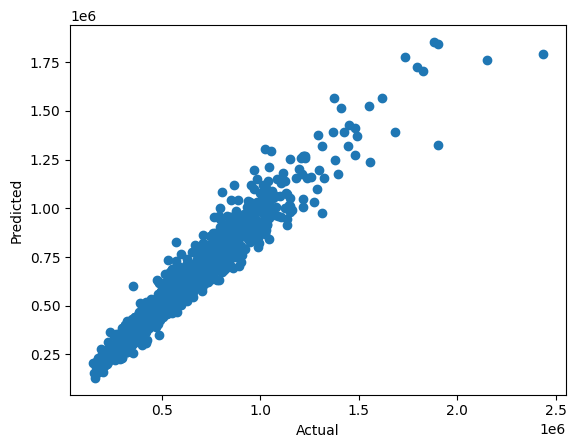

In [34]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

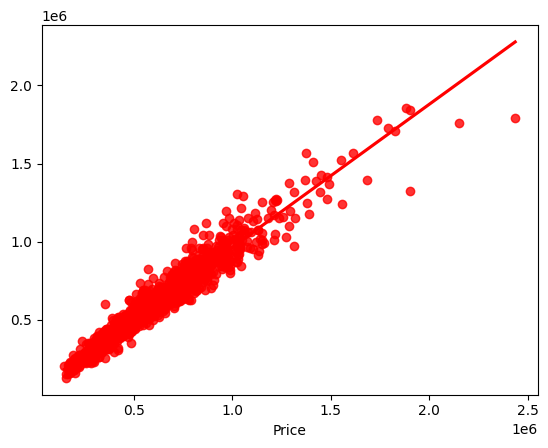

In [35]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [36]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1242,663000,640192.069709,22807.930291
1407,359000,348290.143312,10709.856688
2579,520000,582409.014865,-62409.014865
1075,680000,598728.694037,81271.305963
6843,404000,399340.073767,4659.926233
...,...,...,...
196,814000,747382.017995,66617.982005
4467,807000,855777.401977,-48777.401977
6695,639000,643222.055370,-4222.055370
415,326400,335062.517462,-8662.517462
